#### **Exploratory Data Analysis :** 

##### Roles to Explore

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

#### **Filter for India Data Analyst roles**

##### Top Job Locations for Data Analysts 

In [36]:
df_DA_ind = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_DA_ind['job_location'] = df_DA_ind['job_location'].replace('India', 'Anywhere')
df_DA_ind[['job_location', 'extra_info']]= df_DA_ind['job_location'].str.split(',', n=1, expand=True)
df_DA_city = df_DA_ind['job_location'].value_counts().head(10).to_frame()

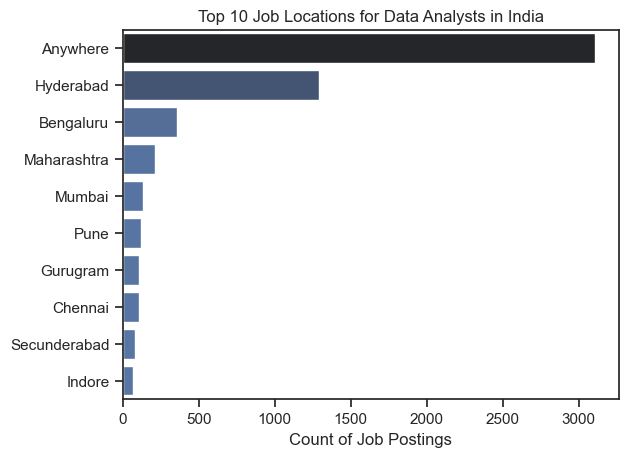

In [28]:
sns.set_theme(style='ticks')
sns.barplot(data= df_DA_city, x='count', y='job_location', hue ='count', palette='dark:b_r', legend= False)
plt.title('Top 10 Job Locations for Data Analysts in India')
plt.xlabel('Count of Job Postings')
plt.ylabel('')
plt.show()

#### Filtering the similar details from United States

In [23]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['job_skills'])

In [37]:
df_city_US = df_DA_US['job_location'].value_counts().head(10).to_frame()

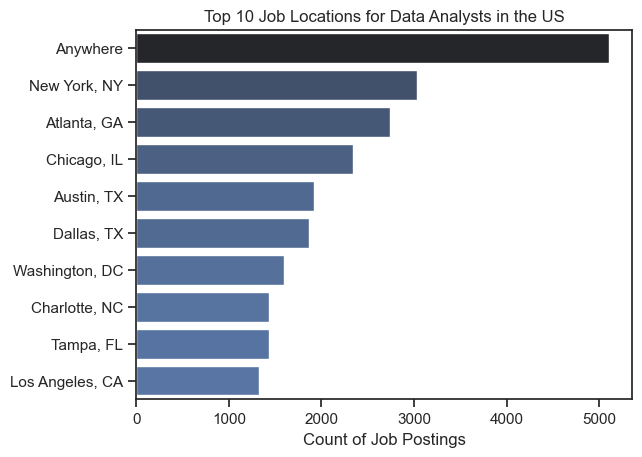

In [27]:
sns.barplot(data = df_city_US, x='count', y= 'job_location', hue = 'count', palette='dark:b_r', legend=False)
plt.title('Top 10 Job Locations for Data Analysts in the US')
plt.xlabel('Count of Job Postings')
plt.ylabel('')
plt.show()

#### **Various Features of Data Analysts Jobs in India**

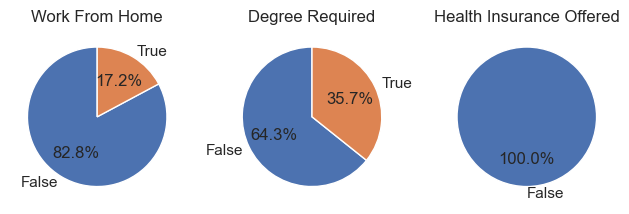

In [30]:
fig, ax = plt.subplots(1,3)

dict_charts={
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention' : 'Degree Required',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i,(col,title) in enumerate(dict_charts.items()):
    ax[i].pie(df_DA_ind[col].value_counts(), startangle=90, autopct='%1.1f%%', labels=df_DA_ind[col].value_counts().index)
    ax[i].set_title(title)
plt.tight_layout()
plt.show()

#### Various Features of Data Analysts Jobs in United States

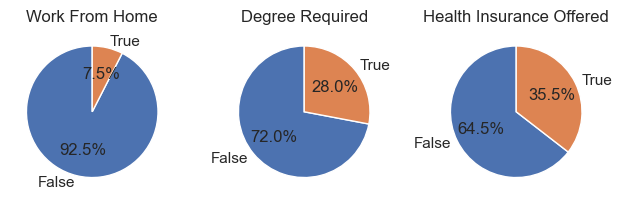

In [32]:
fig, ax = plt.subplots(1,3)

dict_charts={
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention' : 'Degree Required',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i,(col,title) in enumerate(dict_charts.items()):
    ax[i].pie(df_DA_US[col].value_counts(), startangle=90, autopct='%1.1f%%', labels=df_DA_US[col].value_counts().index)
    ax[i].set_title(title)
plt.tight_layout()
plt.show()

##### From the above comparison it can be noted that the percentage of jobs with **work from home** status is much more in **India** as compared to the **United States**. But on the other hand none of the job postings provide a **health insurance** for Data analysts in India which reflects tha lack of an important facility for the employee.

#### Taking a look at Top 10 Companies for Data Analyst in India

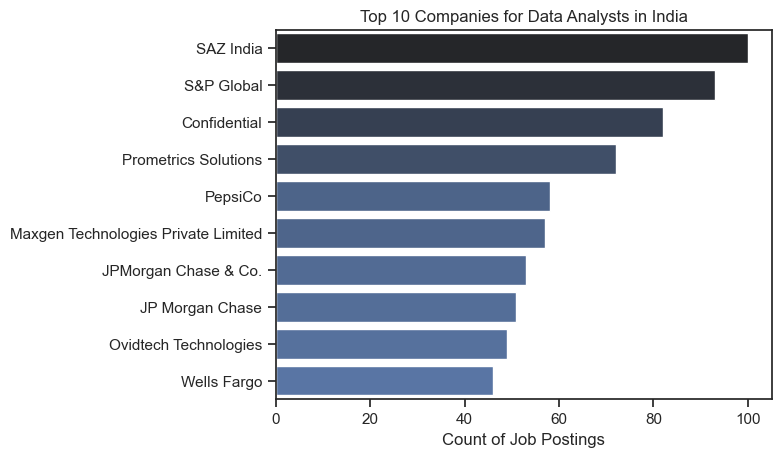

In [34]:
df_company_ind = df_DA_ind['company_name'].value_counts().head(10).to_frame()

sns.barplot(data = df_company_ind, x='count', y= 'company_name', hue = 'count', palette='dark:b_r', legend=False)
plt.title('Top 10 Companies for Data Analysts in India')
plt.xlabel('Count of Job Postings')
plt.ylabel('')
plt.show()

##### Top 10 Companies for Data Analyst in United States

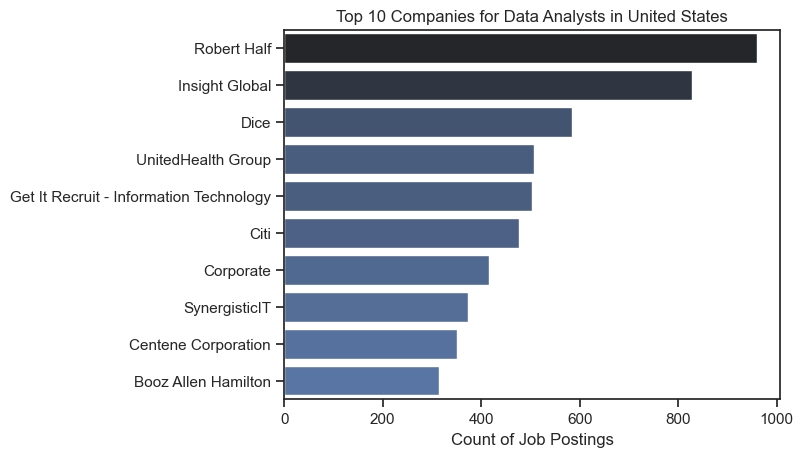

In [35]:
df_company_US = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.barplot(data = df_company_US, x='count', y= 'company_name', hue = 'count', palette='dark:b_r', legend=False)
plt.title('Top 10 Companies for Data Analysts in United States')
plt.xlabel('Count of Job Postings')
plt.ylabel('')
plt.show()